In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

%run nonlinear_function.py

# fraction of test-validation data
perc_training = 0.8

data: 4000
train: 3200


<function matplotlib.pyplot.show(close=None, block=None)>

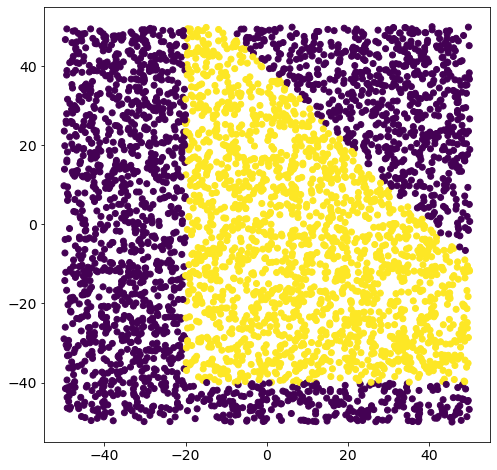

In [2]:
TYPE = 1
datafile = filename('data',TYPE)
labelsfile = filename('labels',TYPE)
x = np.loadtxt(datafile,delimiter=' ')
y = np.loadtxt(labelsfile,delimiter=' ')

# Number of data
N = len(x)
# Dim of each sample
L = len(x[0])

#for i in range(10):
#    print(x[i],y[i])

# Training dataset
N_train = int(perc_training*N)
print(f'data: {N}\ntrain: {N_train}')
plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

In [3]:
x_train,y_train = x[0:N_train],y[0:N_train]
x_valid,y_valid = x[N_train:],y[N_train:]

def Rescale(x):
    # Using variance of generated dataset
    return x/50

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

In [4]:
np.random.seed(12345)

CASE = 1

if CASE==1:
    model = Sequential()
    # Add input layer
    model.add(Dense(L,input_shape=(L,),activation='relu'))
    # Add hidden layers
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    # Insert dropout: fraction of nodes not working in each iteration, to make the model less relying on individual nodes
    # Next line imposes fropout only on last layer
    model.add(Dropout(0.2))
    # Output node for classification -> sigmoid
    model.add(Dense(1,activation='sigmoid'))
    nepoch = 400
    # After each epoch, Keras reshuffles batches
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 20)                60        
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


2022-03-08 17:41:34.746177: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# Choose error function
# Metrics: choose which quantities to print as output
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
# Fit
fit = model.fit(x_train, y_train, epochs=nepoch, batch_size=50, validation_data=(x_valid,y_valid), verbose=2)

Epoch 1/400
64/64 - 1s - loss: 0.6779 - accuracy: 0.5425 - val_loss: 0.6455 - val_accuracy: 0.6538 - 901ms/epoch - 14ms/step
Epoch 2/400
64/64 - 0s - loss: 0.6388 - accuracy: 0.6722 - val_loss: 0.6194 - val_accuracy: 0.6600 - 123ms/epoch - 2ms/step
Epoch 3/400
64/64 - 0s - loss: 0.6109 - accuracy: 0.7009 - val_loss: 0.5939 - val_accuracy: 0.6800 - 171ms/epoch - 3ms/step
Epoch 4/400
64/64 - 0s - loss: 0.5832 - accuracy: 0.7191 - val_loss: 0.5622 - val_accuracy: 0.6913 - 170ms/epoch - 3ms/step
Epoch 5/400
64/64 - 0s - loss: 0.5435 - accuracy: 0.7409 - val_loss: 0.5277 - val_accuracy: 0.7138 - 128ms/epoch - 2ms/step
Epoch 6/400
64/64 - 0s - loss: 0.5075 - accuracy: 0.7603 - val_loss: 0.4960 - val_accuracy: 0.7387 - 128ms/epoch - 2ms/step
Epoch 7/400
64/64 - 0s - loss: 0.4778 - accuracy: 0.7800 - val_loss: 0.4604 - val_accuracy: 0.7713 - 131ms/epoch - 2ms/step
Epoch 8/400
64/64 - 0s - loss: 0.4446 - accuracy: 0.8025 - val_loss: 0.4229 - val_accuracy: 0.8100 - 131ms/epoch - 2ms/step
Epoch 9

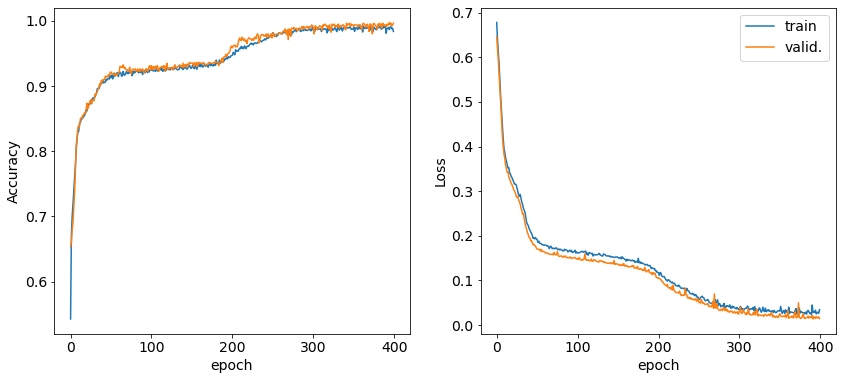

In [7]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train")
ax.plot(fit.history['val_accuracy'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax=AX[1]
ax.plot(fit.history['loss'],label="train")
ax.plot(fit.history['val_loss'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

In [8]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE
grid_r = grid/50

pred = model.predict(grid_r)

51 2601
[50. 50.]


<function matplotlib.pyplot.show(close=None, block=None)>

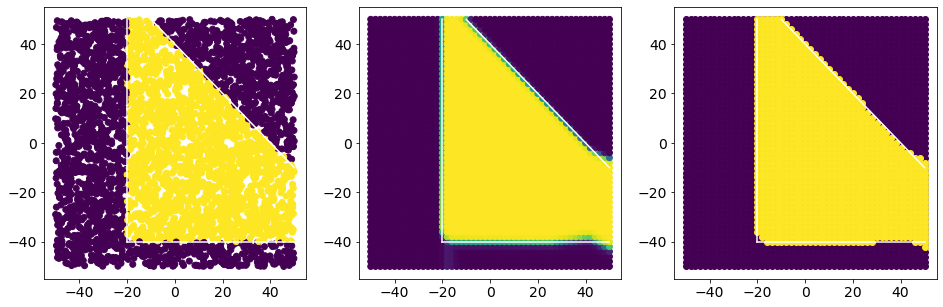

In [9]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
boundaries()
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()
plt.show
plt.show